# Plotter for AL Results

In [150]:
import matplotlib.pyplot as plt
import json
import numpy as np

## Preprocess data

Pre-process results of training cycles for different active learning routines.

In [151]:
results_path = '../results/results_svaal.json'
with open(results_path, 'r') as fj:
    results = json.load(fj)

In [152]:
# Need to unstack each data split
splits = list(results[list(results.keys())[0]].keys())
split_results = {split: [] for split in splits}
for split in splits:
#     print(split)
    for run in results.keys():
        split_results[split].append(results[run][split][0])   # just taking first metric for now...

In [153]:
split_results

{'0.1': [0.8176557261522591, 0.8211451440515786, 0.8157763343441801],
 '0.2': [0.8175087549781634, 0.8193286003456753, 0.8140686820644899],
 '0.3': [0.8171985564966938, 0.8168422553179836, 0.8159446470920915],
 '0.4': [0.8132701805847853, 0.8187359053838923, 0.8151131736984397],
 '0.5': [0.8179332252371068, 0.8130547571240223, 0.8120962465380963],
 '0.6': [0.8123598642898056, 0.8120279221119548, 0.8163593097203454],
 '0.7': [0.8121978004732102, 0.8122548616460501, 0.8160441317875721],
 '0.8': [0.8161042167823379, 0.8154624117176784, 0.813270646484088],
 '0.9': [0.813625958787634, 0.8152775623775977, 0.8145472348042988]}

In [154]:
# Get statistics of runs
# split_stats = {split:  for split in splits}
split_stats = dict()
for split in splits:
    split_stats[split] = dict()
    split_stats[split]['mean'] = np.mean(split_results[split])
    split_stats[split]['q1'] = np.quantile(split_results[split], 0.25)
    split_stats[split]['q3'] = np.quantile(split_results[split], 0.75)
#     split_stats[split].append()

In [155]:
split_stats

{'0.1': {'mean': 0.8181924015160059,
  'q1': 0.8167160302482196,
  'q3': 0.8194004351019188},
 '0.2': {'mean': 0.8169686791294429,
  'q1': 0.8157887185213266,
  'q3': 0.8184186776619193},
 '0.3': {'mean': 0.8166618196355896,
  'q1': 0.8163934512050375,
  'q3': 0.8170204059073387},
 '0.4': {'mean': 0.8157064198890391,
  'q1': 0.8141916771416124,
  'q3': 0.816924539541166},
 '0.5': {'mean': 0.8143614096330752,
  'q1': 0.8125755018310593,
  'q3': 0.8154939911805645},
 '0.6': {'mean': 0.8135823653740353,
  'q1': 0.8121938932008802,
  'q3': 0.8143595870050755},
 '0.7': {'mean': 0.8134989313022775,
  'q1': 0.8122263310596302,
  'q3': 0.814149496716811},
 '0.8': {'mean': 0.8149457583280348,
  'q1': 0.8143665291008833,
  'q3': 0.8157833142500082},
 '0.9': {'mean': 0.8144835853231768,
  'q1': 0.8140865967959664,
  'q3': 0.8149123985909483}}

In [156]:
x = [f'{float(k)*100:0.0f}%' for k in split_stats.keys()]

In [157]:
y_mean = [v["mean"]*100 for k, v in split_stats.items()]
y_q1 = [v["q1"]*100 for k, v in split_stats.items()]
y_q3 = [v["q3"]*100 for k, v in split_stats.items()]

In [158]:
y_mean

[81.8192401516006,
 81.6968679129443,
 81.66618196355896,
 81.57064198890392,
 81.43614096330752,
 81.35823653740353,
 81.34989313022774,
 81.49457583280349,
 81.44835853231768]

In [159]:
full_data_perf = 82.02

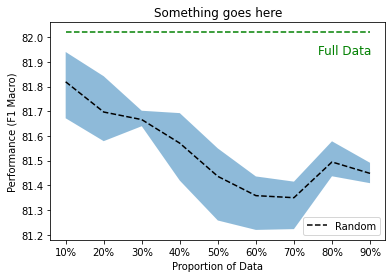

In [160]:
fig, ax = plt.subplots()

plt.plot(x, y_mean, color='black', linestyle='dashed')
plt.fill_between(x, y_q1, y_q3, alpha=0.5)
plt.title('Something goes here')
plt.xlabel('Proportion of Data')
plt.ylabel('Performance (F1 Macro)')
# plt.ylim([min(y_q1), max(y_q3)])
plt.legend(['Random'], loc='lower right')
plt.hlines(y=full_data_perf, xmin=min(x), xmax=max(x), linestyle='dashed', color='green')
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='square', facecolor='white', alpha=0.5)
plt.text(0.8, 0.9, 'Full Data', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', color='green')


plt.show()